In [1]:
import os
from jf import Mymaps
import matplotlib.pyplot as plt 
import numpy as np 
from astropy.wcs import WCS
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import reproject as rp 

[INFO]: No release version set. Setting default to DR15


In [2]:
with fits.open('./data/galaxies_sorted.fits') as hdulist:
    plateifu_list = hdulist[1].data['plateifu']

lofar_file_path = './data/lofar_imgs/'
lofar_list = os.listdir(lofar_file_path)
lofar_list = np.sort(lofar_list)

def cut(arr):
    mask = np.all(np.isnan(arr), axis=1)
    arr = arr[~mask]
    arr = arr.T
    mask = np.all(np.isnan(arr), axis=1)
    arr = arr[~mask]
    arr = arr.T
    return arr

In [22]:
def ptp(n):
    gal = Mymaps(plateifu=plateifu_list[n], max_radii=10)
    with fits.open(lofar_file_path+lofar_list[n]) as hdulofar:
        lofarim = hdulofar[0].data
        lofar_header = hdulofar[0].header
    ha = gal.psf_m()
    lofarim_up, footprint = rp.reproject_exact((lofarim, WCS(lofar_header)), gal.wcs, shape_out=np.shape(ha))
    mean, med, sd = sigma_clipped_stats(lofarim)
    ha[lofarim_up<mean+3*sd] = np.nan
    lofarim_up[np.isnan(ha)] = np.nan
    fig = plt.figure()
    ax1 = plt.subplot(1,2,1,projection=gal.wcs)
    ax1.imshow(ha,origin='lower')
    ax1.contour(lofarim_up, colors='grey', levels=[mean+3*sd,mean+6*sd])
    ax2 = plt.subplot(1,2,2,projection=gal.wcs)
    ax2.imshow(lofarim_up,origin='lower')
    plt.show()
    c = np.corrcoef(lofarim_up[~np.isnan(lofarim_up)],ha[~np.isnan(ha)])[0,1]
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(lofarim_up[~np.isnan(lofarim_up)],ha[~np.isnan(ha)])
    print(c)

[WARNING]: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead (DeprecationWarning)


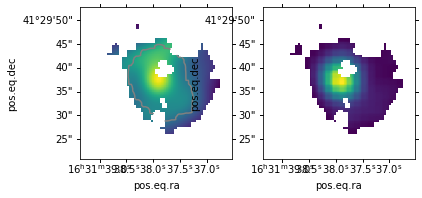

0.7830120110138836


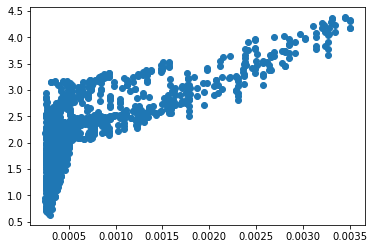

In [23]:
ptp(20)